Linear, Logistic, KNN, SVM, Random Forest

In [317]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [318]:
data = pd.read_csv("Insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [319]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [320]:
data['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [321]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [322]:
data['bmi'].unique()

array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 , 41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 ,
       24.795, 31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115,
       29.92 , 27.5  , 28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 ,
       32.205, 28.595, 49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975,
      

In [323]:
data['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [324]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [325]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [326]:
data['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [327]:
len(data['charges'])

1338

In [328]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [329]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [330]:
len(data)

1338

In [331]:
data.index

RangeIndex(start=0, stop=1338, step=1)

In [332]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [333]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [334]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [335]:
corr = data.corr()
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

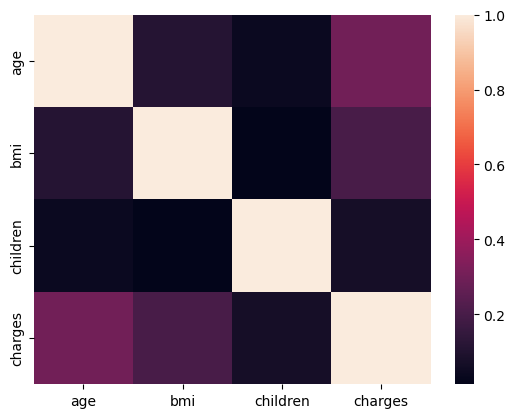

In [336]:
sns.heatmap(corr)

In [337]:
data.isna()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [338]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [339]:
data.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [340]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

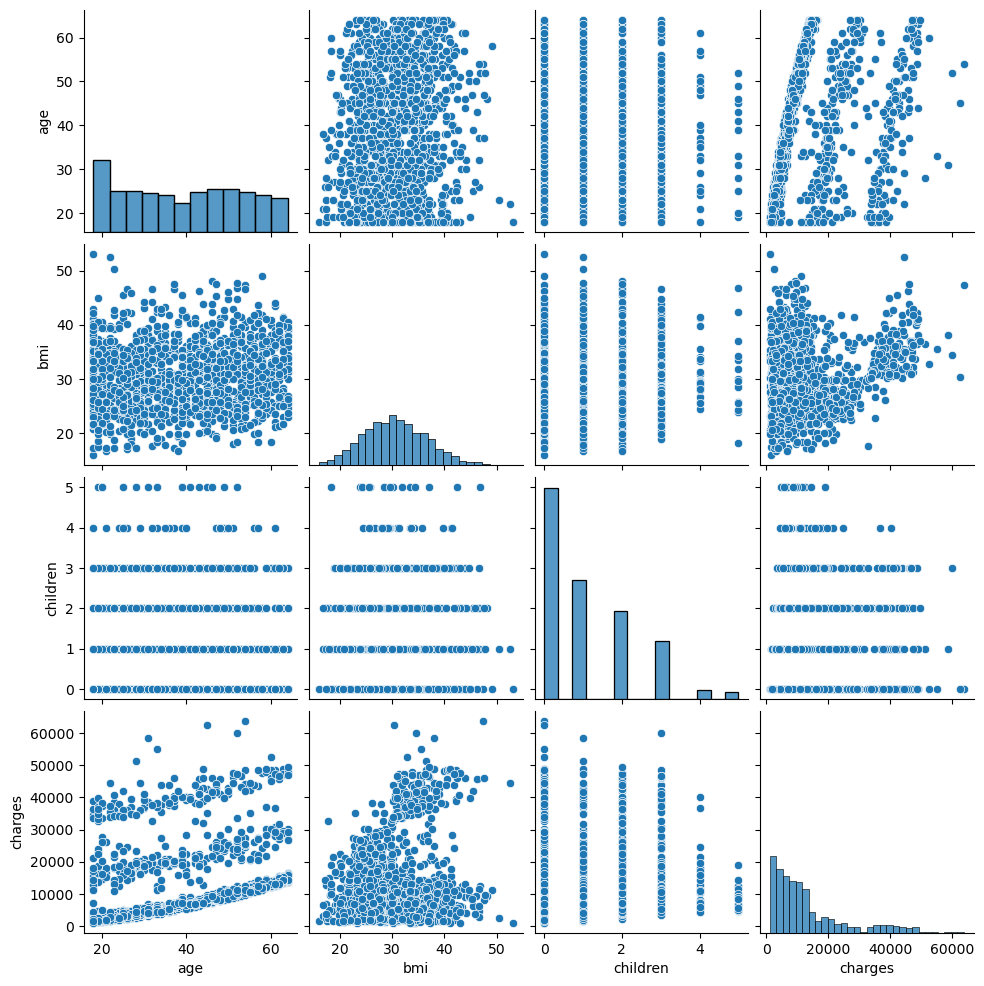

In [341]:
sns.pairplot(data)

<AxesSubplot:xlabel='age', ylabel='Count'>

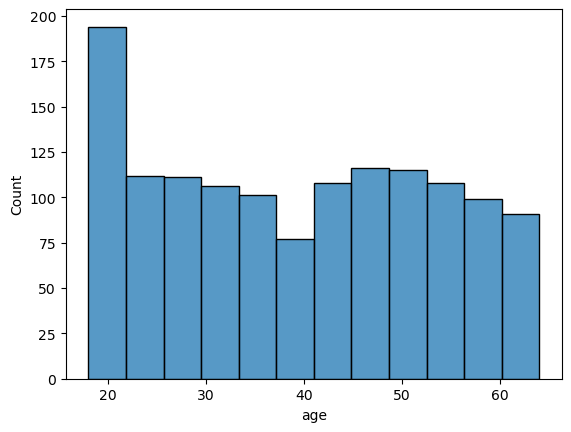

In [342]:
sns.histplot(x=data['age'],data=data)

<AxesSubplot:xlabel='bmi', ylabel='Count'>

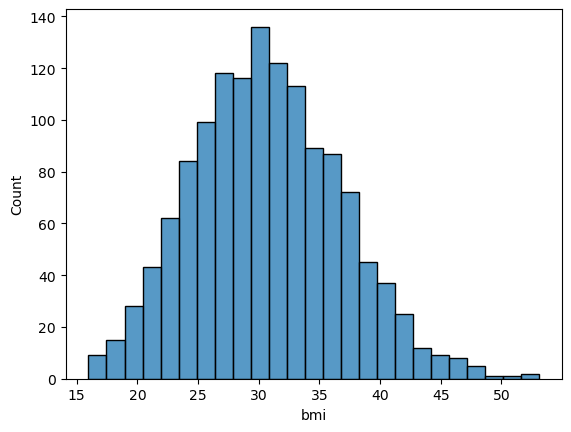

In [343]:
sns.histplot(x=data['bmi'],data=data)

<AxesSubplot:xlabel='children', ylabel='Count'>

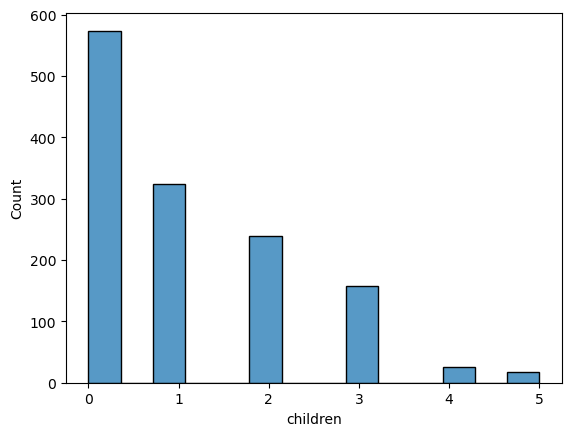

In [344]:
sns.histplot(x=data['children'],data=data)

<AxesSubplot:xlabel='charges', ylabel='Count'>

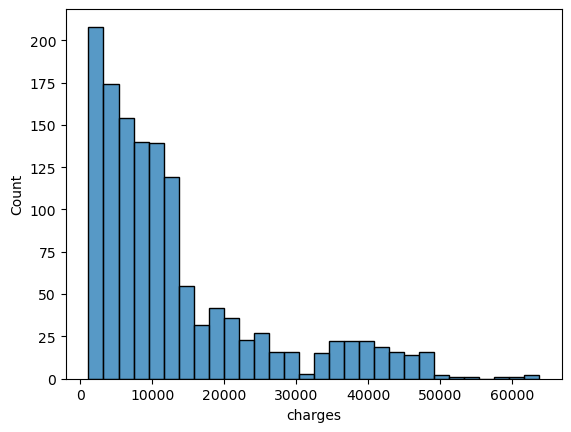

In [345]:
sns.histplot(x=data['charges'],data=data)

<AxesSubplot:xlabel='sex', ylabel='count'>

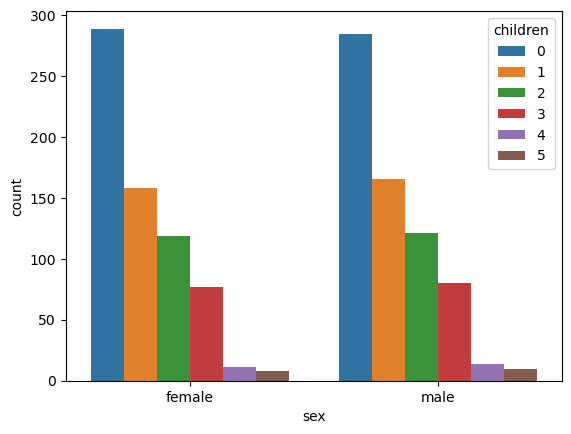

In [346]:
sns.countplot(x = 'sex', data = data, hue = 'children')

<AxesSubplot:xlabel='region', ylabel='count'>

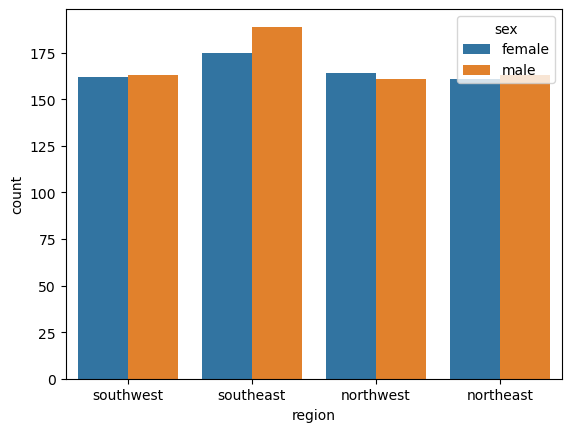

In [347]:
sns.countplot(x='region',data=data,hue='sex')

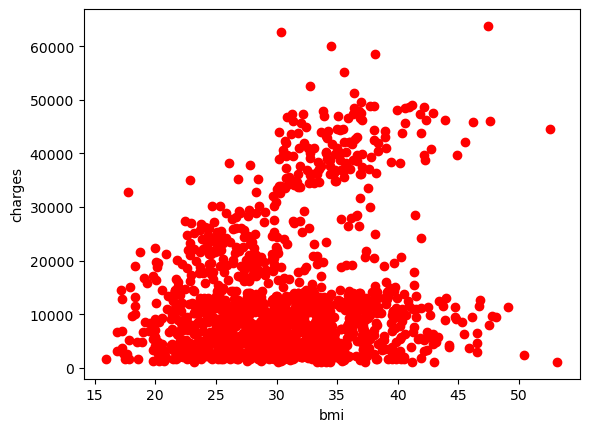

In [348]:
plt.scatter(x=data['bmi'],y=data['charges'],c='r')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()

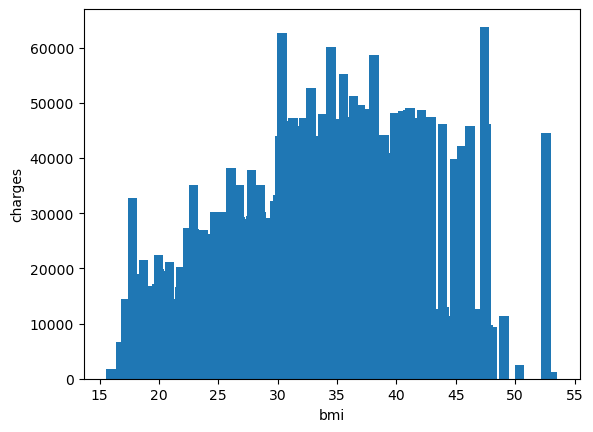

In [349]:
plt.bar(data['bmi'],data['charges'])
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()

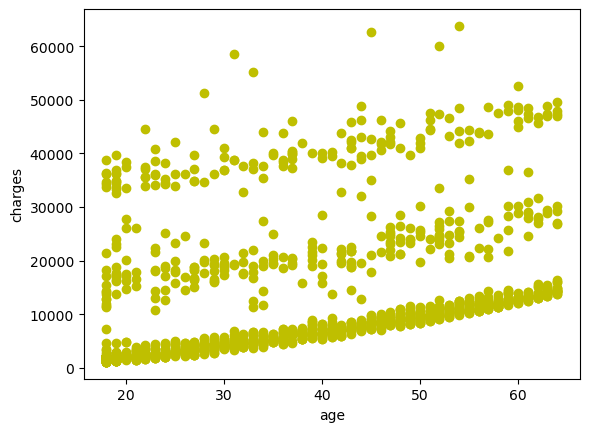

In [350]:
plt.scatter(x=data['age'],y=data['charges'],c='y')
plt.xlabel('age')
plt.ylabel('charges')
plt.show()

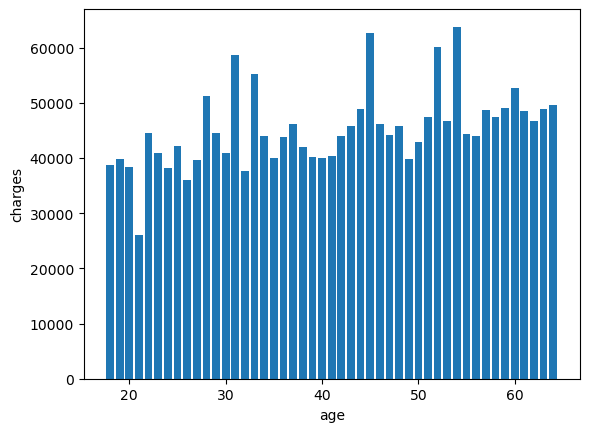

In [351]:
plt.bar(data['age'],data['charges'])
plt.xlabel('age')
plt.ylabel('charges')
plt.show()

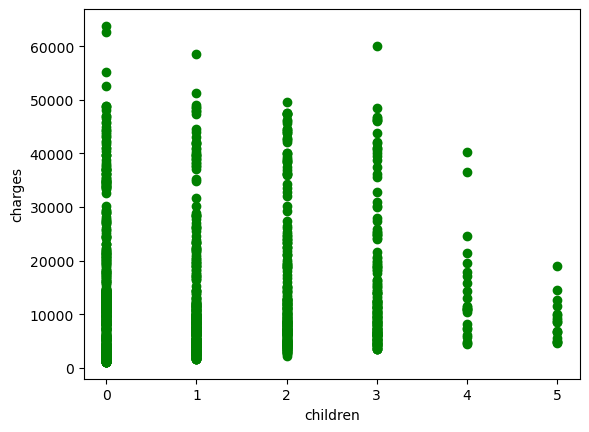

In [352]:
plt.scatter(x=data['children'],y=data['charges'],c='g')
plt.xlabel('children')
plt.ylabel('charges')
plt.show()

<AxesSubplot:xlabel='children', ylabel='charges'>

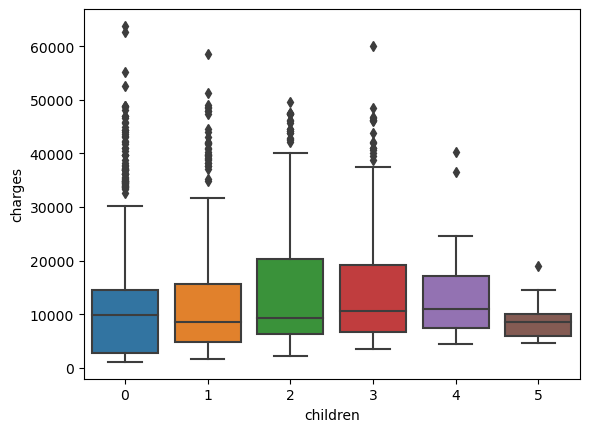

In [353]:
sns.boxplot(x=data["children"], y=data["charges"], data=data)

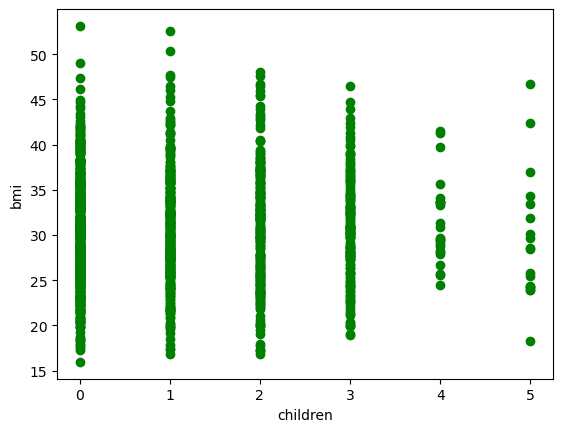

In [354]:
plt.scatter(x=data['children'],y=data['bmi'],c='g')
plt.xlabel('children')
plt.ylabel('bmi')
plt.show()

<AxesSubplot:xlabel='children', ylabel='bmi'>

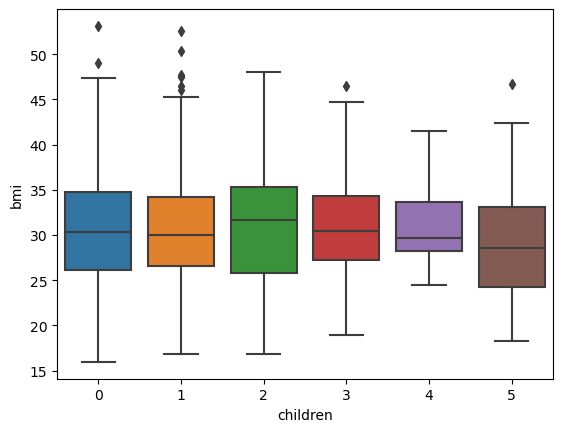

In [355]:
sns.boxplot(x=data["children"], y=data["bmi"], data=data)

<AxesSubplot:xlabel='region', ylabel='bmi'>

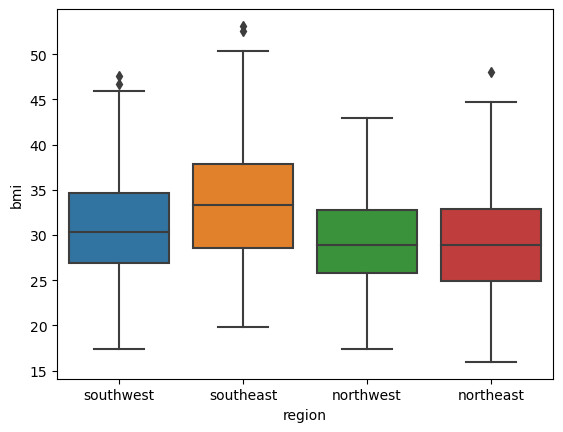

In [356]:
sns.boxplot(x=data["region"], y=data["bmi"], data=data)

<AxesSubplot:xlabel='region', ylabel='charges'>

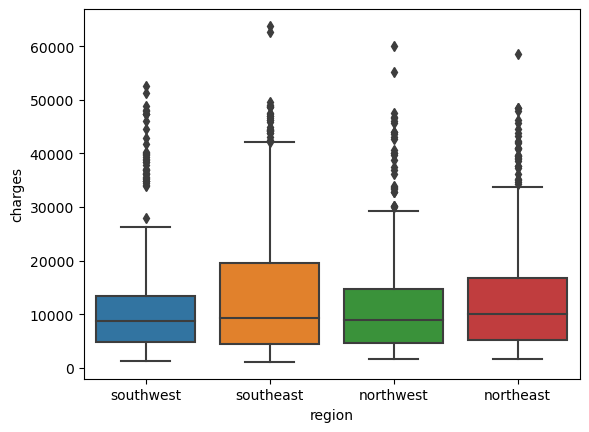

In [357]:
sns.boxplot(x=data["region"], y=data["charges"], data=data)

In [358]:
print(f"Our data has dimensions: {data.shape[0]} by {data.shape[1]}")

Our data has dimensions: 1338 by 7


In [359]:
x = data['age']
y = data['charges']

In [360]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [361]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070,)
(268,)
(1070,)
(268,)


In [362]:
x_train=x_train.values.reshape(-1,1)

In [363]:
x_test=x_test.values.reshape(-1,1)

In [364]:
model = LinearRegression()

In [365]:
model.fit(x_train,y_train)

LinearRegression()

In [366]:
model.score(x_test,y_test)

0.07899146595873285

In [367]:
print(f"intercept: {model.intercept_}")

intercept: 2998.5777306780055


In [368]:
print(f"slope: {model.coef_}")

slope: [262.31687345]


In [369]:
y_pred = model.intercept_ + model.coef_*x_test
print(f"y_pred : {y_pred}")

y_pred : [[ 7982.59832619]
 [17950.63951722]
 [16376.73827653]
 [15852.10452963]
 [ 8507.23207309]
 [11130.40080757]
 [15852.10452963]
 [17688.32264377]
 [10081.13331377]
 [12704.30204826]
 [18737.59013756]
 [17163.68889687]
 [13228.93579515]
 [14015.8864155 ]
 [ 7720.28145274]
 [15589.78765618]
 [11655.03455446]
 [12179.66830136]
 [18475.27326411]
 [19262.22388446]
 [16639.05514998]
 [10868.08393412]
 [15065.15390929]
 [16114.42140308]
 [ 7720.28145274]
 [13753.56954205]
 [14278.20328894]
 [15589.78765618]
 [11655.03455446]
 [10868.08393412]
 [17688.32264377]
 [11917.35142791]
 [16901.37202342]
 [ 7982.59832619]
 [15589.78765618]
 [16901.37202342]
 [10868.08393412]
 [ 8507.23207309]
 [18212.95639066]
 [14802.83703584]
 [10343.45018722]
 [18212.95639066]
 [16114.42140308]
 [18475.27326411]
 [11130.40080757]
 [18737.59013756]
 [ 8244.91519964]
 [10343.45018722]
 [16376.73827653]
 [17950.63951722]
 [18999.90701101]
 [17426.00577032]
 [ 9294.18269343]
 [14802.83703584]
 [ 7720.28145274]
 

In [370]:
print(x_train.shape)
print(y_test.shape)
print(y_pred.shape)

(1070, 1)
(268,)
(268, 1)


In [371]:
y_test = y_test.values.reshape(-1,1)

In [372]:
print(y_test.shape)

(268, 1)


In [373]:
rss = np.sum((y_test - y_pred) ** 2)

In [374]:
print("RSS:", rss)

RSS: 36846983136.88877


In [375]:
x1 = data['bmi']
y = data['charges']

In [376]:
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size = 0.2, random_state=1)

In [377]:
print(x1_train.shape)
print(x1_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070,)
(268,)
(1070,)
(268,)


In [378]:
x1_train = x1_train.values.reshape(-1,1)

In [379]:
x1_test = x1_test.values.reshape(-1,1)

In [380]:
model1 = LinearRegression()

In [381]:
model1.fit(x1_train,y_train)

LinearRegression()

In [382]:
model1.score(x1_test,y_test)

0.05716373981200229

In [383]:
print(f"intercept: {model1.intercept_}")
print(f"slope: {model.coef_}")

intercept: 2001.129553376486
slope: [262.31687345]


In [384]:
y1_pred = model1.coef_*x1_test + model1.intercept_
print(f"y1_pred: {y1_pred}")

y1_pred: [[15009.47211896]
 [13548.64220518]
 [15547.67261351]
 [15412.20718291]
 [10165.667668  ]
 [14592.09214359]
 [15734.39523407]
 [12470.41060215]
 [11531.30565757]
 [11666.77108818]
 [10982.12147946]
 [19099.06363198]
 [13841.54043351]
 [12618.69033024]
 [14606.73705501]
 [13058.03767273]
 [10313.94739609]
 [12142.73070921]
 [15371.93367651]
 [14156.40602896]
 [14174.71216823]
 [16298.2243236 ]
 [12157.37562062]
 [11739.99564526]
 [13026.91723597]
 [12400.84727292]
 [12018.24896217]
 [14204.00199106]
 [14046.56919333]
 [11322.61566989]
 [15108.32527102]
 [11886.44475942]
 [10279.16573148]
 [13687.76886363]
 [11465.4035562 ]
 [10905.23569452]
 [14925.26387832]
 [11410.48513839]
 [16298.2243236 ]
 [13166.04389443]
 [14083.18147188]
 [14592.09214359]
 [12190.32667131]
 [15584.28489205]
 [10641.62728903]
 [12470.41060215]
 [14928.92510617]
 [13599.89939514]
 [ 8609.64583001]
 [12539.97393138]
 [13559.62588874]
 [12874.97628003]
 [10661.76404223]
 [11410.48513839]
 [12018.24896217]
 

In [385]:
y_test = y_test.values.reshape(-1,1)

In [386]:
RSS1 = np.sum((y_test - y1_pred) ** 2)

In [387]:
print(f"RSS :{RSS1}")

RSS :37720249591.561134


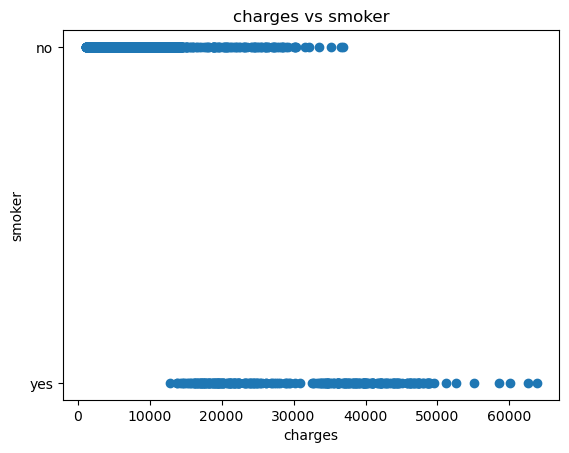

In [388]:
plt.scatter(x=data['charges'],y=data['smoker'])
plt.xlabel("charges")
plt.ylabel("smoker")
plt.title("charges vs smoker")
plt.show()

In [389]:
smoke = pd.get_dummies(data['smoker'],drop_first=True)

In [390]:
data['smoke'] = smoke

In [391]:
data.head()

,age,sex,bmi,children,smoker,region,charges,smoke
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [392]:
xa = data['charges']
ya = data['smoke']

In [393]:
xa_train, xa_test, ya_train, ya_test = train_test_split(xa,ya,test_size=0.2,random_state=1)

In [394]:
print(xa_train.shape)
print(xa_test.shape)
print(ya_train.shape)
print(ya_test.shape)

(1070,)
(268,)
(1070,)
(268,)


In [395]:
xa_train = xa_train.values.reshape(-1,1)
xa_test = xa_test.values.reshape(-1,1)

In [396]:
modela = LogisticRegression()
modela.fit(xa_train,ya_train)

LogisticRegression()

In [397]:
modela.score(xa_test,ya_test)

0.9104477611940298

In [398]:
print(f"intercept: {modela.intercept_}")
print(f"slope: {modela.coef_}")

intercept: [-5.65519559]
slope: [[0.00025126]]


In [399]:
modela.classes_

array([0, 1], dtype=uint8)

In [400]:
modela.predict_proba(xa_test)

array([[9.94735580e-01, 5.26442035e-03],
       [9.42812396e-01, 5.71876039e-02],
       [9.69064287e-01, 3.09357129e-02],
       [9.54639685e-01, 4.53603154e-02],
       [9.94099298e-01, 5.90070182e-03],
       [1.66198820e-02, 9.83380118e-01],
       [9.65015950e-01, 3.49840505e-02],
       [9.38539065e-01, 6.14609354e-02],
       [9.92487229e-01, 7.51277130e-03],
       [6.78235221e-01, 3.21764779e-01],
       [9.22852359e-01, 7.71476405e-02],
       [9.40251179e-01, 5.97488210e-02],
       [9.83087762e-01, 1.69122385e-02],
       [9.79838602e-01, 2.01613981e-02],
       [9.95364614e-01, 4.63538622e-03],
       [9.67759830e-01, 3.22401699e-02],
       [5.32771446e-01, 4.67228554e-01],
       [9.82766883e-01, 1.72331167e-02],
       [1.89608694e-01, 8.10391306e-01],
       [9.06577086e-01, 9.34229138e-02],
       [9.61291063e-01, 3.87089368e-02],
       [9.66359080e-03, 9.90336409e-01],
       [9.74378738e-01, 2.56212616e-02],
       [9.71623231e-01, 2.83767691e-02],
       [9.939494

In [401]:
ya_pred = modela.predict(x_test)

In [402]:
print(f"ya_pred :{ya_pred}")

ya_pred :[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [403]:
pd.DataFrame(confusion_matrix(ya_test,ya_pred),columns=['Predicted No','Predicted Yes'],index=['No','Yes'])

,Predicted No,Predicted Yes
No,214,0
Yes,54,0


In [404]:
print(classification_report(ya_test,ya_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       214
           1       0.00      0.00      0.00        54

    accuracy                           0.80       268
   macro avg       0.40      0.50      0.44       268
weighted avg       0.64      0.80      0.71       268



C:\Users\Noah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Noah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Noah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [405]:
gender = pd.get_dummies(data['sex'],drop_first=True)

In [406]:
data['gender'] = gender

In [407]:
data.head()

,age,sex,bmi,children,smoker,region,charges,smoke,gender
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1


In [408]:
xb = data['charges']
yb = data['gender']

In [409]:
xb_train, xb_test, yb_train, yb_test = train_test_split(xb, yb, test_size = 0.2, random_state=1)

In [410]:
print(xb_train.shape)
print(xb_test.shape)
print(yb_train.shape)
print(yb_test.shape)

(1070,)
(268,)
(1070,)
(268,)


In [411]:
xb_train = xb_train.values.reshape(-1,1)
xb_test = xb_test.values.reshape(-1,1)

In [412]:
modelb = LogisticRegression()

In [413]:
modelb.fit(xb_train,yb_train)

LogisticRegression()

In [414]:
modelb.score(xb_test,yb_test)

0.48880597014925375

In [415]:
modelb.classes_

array([0, 1], dtype=uint8)

In [416]:
print(f"intercept: {modelb.intercept_}")
print(f"slope: {modelb.coef_}")

intercept: [-2.47525154e-10]
slope: [[5.74297972e-06]]


In [417]:
modelb.predict_proba(xb_test)

array([[0.49763616, 0.50236384],
       [0.48370543, 0.51629457],
       [0.48737015, 0.51262985],
       [0.48509926, 0.51490074],
       [0.49698055, 0.50301945],
       [0.44459853, 0.55540147],
       [0.486644  , 0.513356  ],
       [0.48326817, 0.51673183],
       [0.49559122, 0.50440878],
       [0.47197603, 0.52802397],
       [0.48187464, 0.51812536],
       [0.48343983, 0.51656017],
       [0.49090114, 0.50909886],
       [0.48987846, 0.51012154],
       [0.49836689, 0.50163311],
       [0.48712661, 0.51287339],
       [0.46847777, 0.53152223],
       [0.49079192, 0.50920808],
       [0.45947488, 0.54052512],
       [0.48068088, 0.51931912],
       [0.48604421, 0.51395579],
       [0.44150061, 0.55849939],
       [0.48847779, 0.51152221],
       [0.48787826, 0.51212174],
       [0.49683642, 0.50316358],
       [0.49043238, 0.50956762],
       [0.48764618, 0.51235382],
       [0.48810899, 0.51189101],
       [0.49228343, 0.50771657],
       [0.49476677, 0.50523323],
       [0.

In [418]:
yb_pred = modelb.predict(xb_test)

In [419]:
print(f"yb_pred:{yb_pred}")

yb_pred:[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]


In [420]:
pd.DataFrame(confusion_matrix(yb_test,yb_pred),columns=['Predicted No','Predicted Yes'],index=['No','Yes'])

,Predicted No,Predicted Yes
No,0,137
Yes,0,131


In [421]:
print(classification_report(yb_test,yb_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       137
           1       0.49      1.00      0.66       131

    accuracy                           0.49       268
   macro avg       0.24      0.50      0.33       268
weighted avg       0.24      0.49      0.32       268



C:\Users\Noah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Noah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Noah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [422]:
xc = data['bmi']
yc = data['gender']

In [423]:
xc_train, xc_test, yc_train, yc_test = train_test_split(xc, yc, test_size=0.2, random_state=1)

In [424]:
print(xc_train.shape)
print(xc_test.shape)
print(yc_train.shape)
print(yc_test.shape)

(1070,)
(268,)
(1070,)
(268,)


In [425]:
xc_train = xc_train.values.reshape(-1,1)
xc_test = xc_test.values.reshape(-1,1)

In [426]:
modelc = LogisticRegression()

In [427]:
modelc.fit(xc_train,yc_train)

LogisticRegression()

In [428]:
modelc.score(xc_test,yc_test)

0.5223880597014925

In [429]:
modelc.classes_

array([0, 1], dtype=uint8)

In [430]:
print(f"modelc intercept: {modelc.intercept_}")

modelc intercept: [-0.33149167]


In [431]:
print(f"modelc slope: {modelc.coef_}")

modelc slope: [[0.01202926]]


In [432]:
modelc.predict_proba(xc_test)

array([[0.47604136, 0.52395864],
       [0.48802447, 0.51197553],
       [0.47163274, 0.52836726],
       [0.472742  , 0.527258  ],
       [0.51580451, 0.48419549],
       [0.4794629 , 0.5205371 ],
       [0.47010421, 0.52989579],
       [0.49687877, 0.50312123],
       [0.50459236, 0.49540764],
       [0.50347973, 0.49652027],
       [0.50910246, 0.49089754],
       [0.44268433, 0.55731567],
       [0.4856203 , 0.5143797 ],
       [0.49566087, 0.50433913],
       [0.47934281, 0.52065719],
       [0.49205266, 0.50794734],
       [0.51458768, 0.48541232],
       [0.49957028, 0.50042972],
       [0.47307183, 0.52692817],
       [0.48303655, 0.51696345],
       [0.48288636, 0.51711364],
       [0.46549219, 0.53450781],
       [0.49944998, 0.50055002],
       [0.50287829, 0.49712171],
       [0.49230822, 0.50769178],
       [0.49745014, 0.50254986],
       [0.50059276, 0.49940724],
       [0.48264606, 0.51735394],
       [0.48393776, 0.51606224],
       [0.50630633, 0.49369367],
       [0.

In [433]:
yc_pred = modelc.predict(xc_test)

In [434]:
pd.DataFrame(confusion_matrix(yc_test,yc_pred), columns = ['Predicted No','Predicted Yes'], index = ['No','Yes'])

,Predicted No,Predicted Yes
No,45,92
Yes,36,95


In [435]:
print(classification_report(yc_test,yc_pred))

              precision    recall  f1-score   support

           0       0.56      0.33      0.41       137
           1       0.51      0.73      0.60       131

    accuracy                           0.52       268
   macro avg       0.53      0.53      0.51       268
weighted avg       0.53      0.52      0.50       268



In [436]:
from sklearn.neighbors import KNeighborsClassifier

In [437]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['region'] = label_encoder.fit_transform(data['region'])
print(data.head())

   age     sex     bmi  children smoker  region      charges  smoke  gender
0   19  female  27.900         0    yes       3  16884.92400      1       0
1   18    male  33.770         1     no       2   1725.55230      0       1
2   28    male  33.000         3     no       2   4449.46200      0       1
3   33    male  22.705         0     no       1  21984.47061      0       1
4   32    male  28.880         0     no       1   3866.85520      0       1


In [438]:
xk = data['bmi']
yk = data['region']
xk
yk

0       3
1       2
2       2
3       1
4       1
       ..
1333    1
1334    0
1335    2
1336    3
1337    1
Name: region, Length: 1338, dtype: int32

In [439]:
xk_train,xk_test,yk_train,yk_test = train_test_split(xk,yk,test_size=0.2,random_state=1)

In [440]:
print(xk_train.shape)
print(xk_test.shape)
print(yk_train.shape)
print(yk_test.shape)

(1070,)
(268,)
(1070,)
(268,)


In [441]:
xk_train = xk_train.values.reshape(-1,1)
xk_test = xk_test.values.reshape(-1,1)

In [442]:
NN = KNeighborsClassifier(n_neighbors=5)

In [443]:
NN.fit(xk_train,yk_train)

KNeighborsClassifier()

In [444]:
NN.score(xk_test,yk_test)

C:\Users\Noah\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.40298507462686567

In [445]:
yNN_pred = NN.predict(xk_test)

C:\Users\Noah\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [446]:
print(f"yNN_pred : {yNN_pred}")

yNN_pred : [2 3 1 1 0 3 3 1 0 1 3 2 0 0 2 3 0 2 1 0 0 2 0 1 1 3 0 2 0 0 1 0 1 0 1 1 0
 2 2 1 2 3 1 3 0 1 3 0 0 0 3 2 1 2 0 3 0 2 3 2 2 2 0 1 1 1 3 0 3 3 2 2 3 3
 1 0 0 1 0 1 0 2 0 2 1 2 0 3 0 3 0 3 2 3 1 2 3 3 1 0 2 1 1 3 0 1 1 3 2 0 2
 2 0 0 2 3 2 0 3 0 3 1 0 0 2 2 1 1 0 3 0 2 1 2 3 3 3 0 3 0 0 2 0 2 0 1 3 2
 2 0 2 1 2 0 2 1 1 0 0 3 1 1 0 1 0 2 2 2 1 0 3 3 1 1 3 0 2 0 0 3 0 0 2 0 0
 1 0 2 0 0 1 2 0 2 3 3 1 2 1 0 2 3 0 3 2 3 1 1 1 3 1 0 1 3 2 1 0 2 2 3 1 2
 1 0 1 0 1 3 1 2 1 1 2 0 1 2 0 1 3 1 2 2 2 0 2 1 3 0 3 3 3 1 2 2 2 2 2 1 0
 3 2 1 3 0 2 2 1 0]


In [447]:
pd.DataFrame(confusion_matrix(yk_test,yNN_pred),columns=['Predicted 0','Predicted 1','Predicted 2','Predicted 3'],index = ['Actual 0','Actual 1','Actual 2', 'Actual 3'])

,Predicted 0,Predicted 1,Predicted 2,Predicted 3
Actual 0,29,20,6,6
Actual 1,17,23,11,15
Actual 2,16,14,37,15
Actual 3,15,10,15,19


In [448]:
print(classification_report(yk_test,yNN_pred))

              precision    recall  f1-score   support

           0       0.38      0.48      0.42        61
           1       0.34      0.35      0.35        66
           2       0.54      0.45      0.49        82
           3       0.35      0.32      0.33        59

    accuracy                           0.40       268
   macro avg       0.40      0.40      0.40       268
weighted avg       0.41      0.40      0.40       268



In [449]:
xk1 = data['charges']
xk1


0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [450]:
yk = data['region']
yk

0       3
1       2
2       2
3       1
4       1
       ..
1333    1
1334    0
1335    2
1336    3
1337    1
Name: region, Length: 1338, dtype: int32

In [451]:
xk1_train, xk1_test, yk_train, yk_test = train_test_split(xk1,yk,test_size=0.2,random_state=1)

In [452]:
print(xk1_test.shape)
print(xk1_train.shape)
print(yk_test.shape)
print(yk_train.shape)

(268,)
(1070,)
(268,)
(1070,)


In [453]:
xk1_test = xk1_test.values.reshape(-1,1)
xk1_train = xk1_train.values.reshape(-1,1)

In [454]:
NN1 = KNeighborsClassifier(n_neighbors=5)

In [455]:
NN1.fit(xk1_train,yk_train)

KNeighborsClassifier()

In [456]:
NN1.score(xk1_test,yk_test)

C:\Users\Noah\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.332089552238806

In [457]:
yNN1_pred = NN1.predict(xk1_test)

C:\Users\Noah\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [458]:
print(f"yNN1_pred : {yNN1_pred}")

yNN1_pred : [2 3 3 0 1 0 0 0 0 2 1 0 1 0 2 1 1 1 1 2 0 0 1 1 0 0 0 3 1 3 0 0 0 0 1 0 2
 0 3 2 0 0 0 0 1 1 0 3 3 0 1 2 0 2 2 1 0 2 3 2 2 0 1 1 0 3 1 2 1 0 2 2 3 1
 1 0 1 1 1 0 1 1 3 3 0 2 0 2 0 1 0 1 0 0 2 0 3 1 1 1 3 3 1 3 2 0 3 1 0 1 1
 2 2 0 1 3 0 1 2 0 0 3 2 3 1 0 3 2 1 1 3 2 3 2 2 3 2 2 0 0 0 3 3 1 0 1 2 0
 2 0 2 0 0 2 2 2 0 3 0 2 2 2 0 2 1 2 0 0 1 2 1 3 3 0 2 1 0 1 2 2 0 0 1 2 3
 1 3 2 1 1 2 2 0 1 0 0 1 1 0 2 3 3 1 0 2 2 3 0 3 1 1 0 2 2 0 2 3 3 2 0 2 3
 1 2 2 3 0 3 2 1 3 0 3 0 1 1 1 2 0 1 3 1 1 3 0 0 1 0 1 3 2 0 1 2 2 0 3 3 2
 2 2 0 2 1 2 2 1 3]


In [459]:
pd.DataFrame(confusion_matrix(yk_test,yNN1_pred),columns=['Predicted 0','Predicted 1','Predicted 2','Predicted 3'],index = ['Actual 0','Actual 1','Actual 2', 'Actual 3'])

,Predicted 0,Predicted 1,Predicted 2,Predicted 3
Actual 0,25,11,12,13
Actual 1,20,22,14,10
Actual 2,18,21,30,13
Actual 3,18,16,13,12


In [460]:
print(classification_report(yk_test,yNN1_pred))

              precision    recall  f1-score   support

           0       0.31      0.41      0.35        61
           1       0.31      0.33      0.32        66
           2       0.43      0.37      0.40        82
           3       0.25      0.20      0.22        59

    accuracy                           0.33       268
   macro avg       0.33      0.33      0.32       268
weighted avg       0.34      0.33      0.33       268



KNN not good on large datasets

In [461]:
data.head()

,age,sex,bmi,children,smoker,region,charges,smoke,gender
0,19,female,27.900,0,yes,3,16884.92400,1,0
1,18,male,33.770,1,no,2,1725.55230,0,1
2,28,male,33.000,3,no,2,4449.46200,0,1
3,33,male,22.705,0,no,1,21984.47061,0,1
4,32,male,28.880,0,no,1,3866.85520,0,1


In [462]:
from sklearn import svm

In [463]:
xs = data['charges']

In [464]:
ys = data['smoke']

In [465]:
print(xs)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [466]:
print(ys)

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoke, Length: 1338, dtype: uint8


In [467]:
xs_train, xs_test, ys_train, ys_test = train_test_split(xs,ys,test_size=0.2,random_state=1)

In [468]:
print(xs_train.shape)
print(xs_test.shape)
print(ys_train.shape)
print(ys_test.shape)

(1070,)
(268,)
(1070,)
(268,)


In [469]:
xs_train = xs_train.values.reshape(-1,1)
xs_test = xs_test.values.reshape(-1,1)

In [470]:
models = svm.SVC()
models.fit(xs_train,ys_train)

SVC()

In [471]:
models.score(xs_test,ys_test)

0.9328358208955224

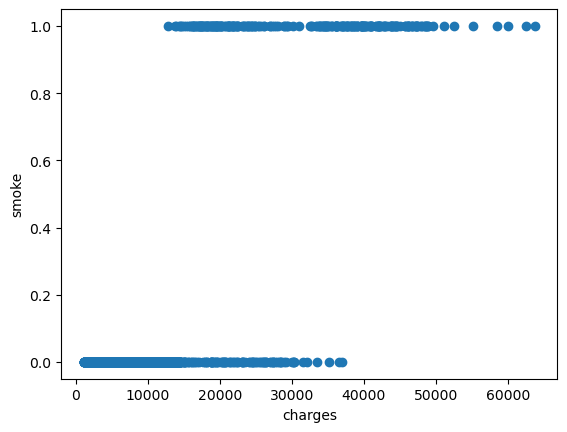

In [472]:
plt.scatter(x = data['charges'],y = data['smoke'])
plt.xlabel('charges')
plt.ylabel("smoke")
plt.show()

In [473]:
from sklearn.ensemble import RandomForestRegressor

In [476]:
regressor = RandomForestRegressor(n_estimators = 500, random_state = 1)
regressor.fit(xs_train,ys_train)

RandomForestRegressor(n_estimators=500, random_state=1)

In [477]:
regressor.score(xs_train,ys_train)

0.9414024055614973